### Exercise 1

Use webscrabing to retrieve the table data from https://www.worldometers.info/coronavirus/ and create a pandas DataFrame to show the data.

In [2]:
import bs4
import requests
import pandas as pd
import numpy as np

r = requests.get('https://www.worldometers.info/coronavirus/')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

columns = []
data = []
cities = []


for header in soup.find_all('th'):
    columns.append(header.getText()) 
    
for table_data in soup.find_all('td'):
    data.append(table_data.getText())
    
        
cities_tag = soup.find_all('td')
cities_tag_np = np.array(cities_tag)
cities_tag_np_2d = np.reshape(data,(int(len(data)/9),9))

df = pd.DataFrame(data=cities_tag_np_2d, columns=columns)

print(df)

    Country,Other TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0          China      80,785     +31       3,158       +22         61,504    
1          Italy      10,149                 631                    1,004    
2           Iran       8,042                 291                    2,731    
3       S. Korea       7,755    +242          61        +1            288    
4         France       1,784                  33                       12    
..            ...        ...      ...         ...       ...            ...   
116     Mongolia           1                                                 
117    St. Barth           1                                                 
118         Togo           1                                                 
119       Turkey           1                                                 
120        Total:    119,389      465       4,300        26         66,584   

    ActiveCases Serious,Critical Tot Cases/1M pop  
0       16,

Clean Up the data by removing the '+' symbol from colums "NewDeaths" and "NewCases"

HINT!! Be VERY observant in reguards to the amount of whitespace

In [3]:
filter = df["NewCases"] != " "
dfNew = df[filter]

dfNew["NewCases"] = dfNew["NewCases"].str.slice(2,-1)

dfNew["NewDeaths"] = dfNew["NewDeaths"].str.slice(1,-1)

dfNew.replace(" ", "0", inplace=True)
dfNew.replace("", "0", inplace=True)

dfNew.head(30)

C:\Users\benja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\benja\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\benja\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,"80,785",31,"3,158",22,"61,504","16,123","4,492",56.1
3,S. Korea,"7,755",242,61,1,288,"7,406",54,151.3
7,USA,"1,010",16,31,1,15,964,10,3.1
10,Switzerland,508,11,3,0,3,502,0,58.7
11,Norway,407,7,0,0,1,406,0,75.1
15,Denmark,340,78,0,0,1,339,0,58.7
17,Austria,206,24,0,0,4,202,1,22.9
20,Australia,127,11,3,0,24,100,1,5.0
22,Bahrain,112,2,0,0,30,82,1,65.8
23,Canada,97,2,1,0,9,87,1,2.6


Create a bar plot which shows the number of TotalCases in each country (remember to leave out the total row)

Hint! the numbers should be stripped from spacing and thousand separators should be removed

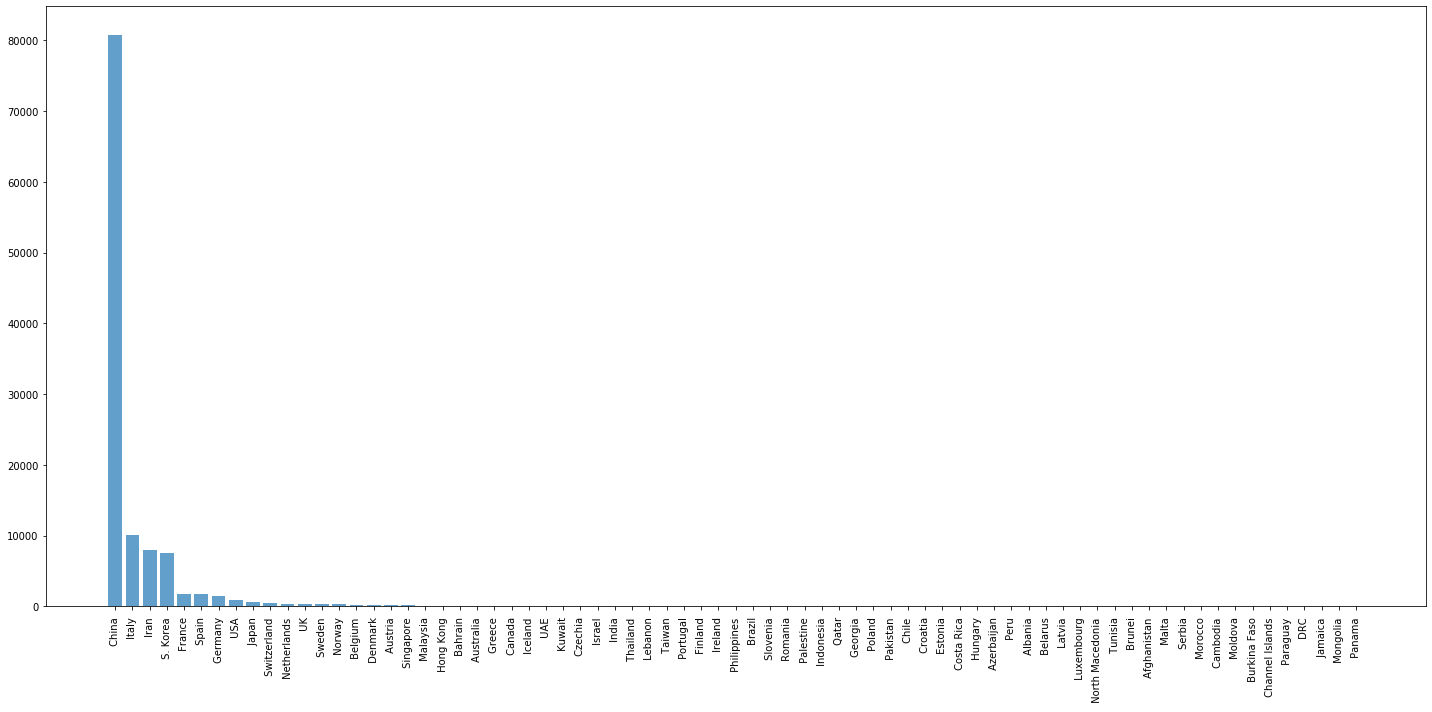

In [116]:
import matplotlib.pyplot as plt
import numpy as np

countries = list(dfNew['Country,Other'])
cases = list(dfNew['TotalCases'])

cases = [int(i.strip().replace(",","")) for i in cases] 

# Removing the total row in the end
countries.pop()
cases.pop()

plt.figure(figsize=(20,10))
plt.bar(countries, cases, width=0.8, align='center',alpha=0.7)
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()

plt.show()